# Card Game simulator

This is a simulator for the cardgame presented in [Coursera](http://www.coursera.org) [Game Theory Introduction](https://www.coursera.org/learn/game-theory-introduction), by Michihiro Kandori, University of Tokyo.

The [instructions](https://www.coursera.org/learn/game-theory-introduction/supplement/TKFX1/card-game-challenge-instruction) is as follows:

1. From a deck of card, players will use only 8: King, Ace, 2 and 3 of spades and hearts.
1. The player with the spades is the black player, the other one is the red player.
1. The round consists in each player picking a card from her hand of four cards and simultaneously revealing it to the other player.
1. The red player wins if both cards are King or the cards are different, except one of them is King.
1. The black player wins if one of the cards are King or the cards are equal.

This goal of this implementation is to evaluate some statistics from several rounds of play. In game theory players chose their strategies based upon awareness of strategies chosen by the other player. This implementation doesn't take this into account, as the cards are chosen at random with uniform distribution. It will be interesting construct some way of evaluate the history of cards chosen and success rate by the other player in order the chose a card, this will be for the future.

In [1]:
from itertools import product
from itertools import repeat
import random

# Labels of the cards in game.
labels = ['K','A','2','3']


# The condition for black win the round.
# We don't need to implement the red player conditions to with, as it is the complement of black conditions.
black_wins = lambda cards: (( (cards[0]!='K') ^ (cards[1] != 'K')) or ((cards[0] == cards[1]) and cards[0] != 'K') ) 


# Simulate a game with a given number of rounds.        
def simulate(rounds=30):    

    # Play a round and update some statistics.
    def play_round():
        
        # Cards chosen for black and red players, respectively.
        cards = random.choice(labels),random.choice(labels)
        
        # Update the distribution of cards chosen by black.
        black[cards[0]] = black.get(cards[0],0)+1
        
        # Update the distribution of cards chosen by red.
        red[cards[1]] = red.get(cards[1],0)+1
        
        # Decide the winner.
        if black_wins(cards):
            # Update number of victories for black.
            victory['black'] = victory.get('black',0) + 1
        else:
            # Update number of victories for red.
            victory['red'] = victory.get('red',0) + 1    
    
    
    # Distribution of cards chosen. 
    black, red = {}, {}
    
    # Number of victories.
    victory = {'black':0, 'red':0}
    
    # Play the rounds.
    for _ in repeat(None, rounds):
        play_round()
    
    # Return statistis.
    return {'victory': victory, 'black': black, 'red': red}

The course asks its students to play with someonelse for 30 rounds and take some statistics. Let's see what happen with a first try

In [2]:
simulate(30)

{'black': {'2': 7, '3': 10, 'A': 8, 'K': 5},
 'red': {'2': 6, '3': 5, 'A': 9, 'K': 10},
 'victory': {'black': 16, 'red': 14}}

In the execution above, black won. Remembering that in this implementation each player chooses her card at random, with no strategy at all. So, with you're black and you are certain the other player will choose at random, you choose at random too.

Let's see a higher number of rounds.

In [3]:
simulate(300)

{'black': {'2': 62, '3': 69, 'A': 81, 'K': 88},
 'red': {'2': 76, '3': 76, 'A': 66, 'K': 82},
 'victory': {'black': 178, 'red': 122}}

With 300 rounds black won as well. Will it be black always wins whether both choose cards at random? Let's repeat the 30 rounds simulation a thousand times to see.

In [4]:
scores = []
NUMBER_OF_PLAYS = 1000
NUMBER_OF_ROUNDS = 30

for _ in repeat(None,NUMBER_OF_PLAYS):
    score = simulate(NUMBER_OF_ROUNDS)
    scores.append([score['victory']['black'], score['victory']['red']])

In [7]:
# Renders graphs inline.
%matplotlib inline

# A powerfull data manipulation library.
import pandas as pd

# Graphing library.
import matplotlib.pyplot as plt

# Make the graphs nice looking.
plt.style.use('ggplot')

# Set the figure size for all graphs.
plt.rcParams['figure.figsize'] = (12,6)

# Transform our data into a DataFrame object.
scores = pd.DataFrame(scores, columns=['Black', 'Red'])

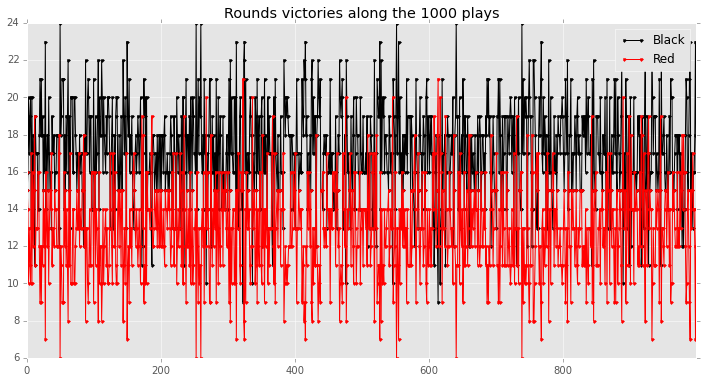

In [10]:
scores.plot(marker='.', color=['black','red']);
plt.title('Rounds victories along the {} plays'.format(NUMBER_OF_PLAYS));

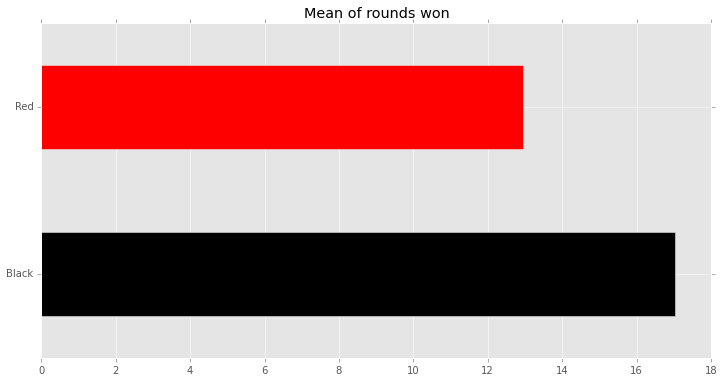

In [12]:
scores.mean().plot('barh', color=['black', 'red']);
plt.title('Mean of rounds won');

In [21]:
tie = len(scores[(scores.Black - scores.Red) == 0])
black_won = len(scores[(scores.Black - scores.Red) > 0])
red_won = len(scores[(scores.Black - scores.Red) < 0])

tie,black_won,red_won

(115, 723, 162)

It's clear that if both players chose cards at random, black has the advantage.